<a href="https://colab.research.google.com/github/JoshK68/mental_health_eda/blob/main/Predicting_anxiety.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data =pd.read_csv('/content/drive/MyDrive/Datasets/Independent_projects/predicting_anxiety/data.csv.zip (Unzipped Files)/data.csv', sep=r'\t', engine='python')

In [3]:
##r '\t'

In [4]:
data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,Q4I,Q4E,Q5A,Q5I,Q5E,Q6A,Q6I,Q6E,Q7A,Q7I,Q7E,Q8A,Q8I,Q8E,Q9A,Q9I,Q9E,Q10A,Q10I,Q10E,Q11A,Q11I,Q11E,Q12A,Q12I,Q12E,Q13A,Q13I,Q13E,Q14A,...,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,8,2044,4,34,2153,4,33,2416,4,10,2818,4,13,2259,2,21,5541,1,38,4441,4,31,2451,4,24,3325,4,14,1416,4,...,5,7,7,7,7,7,5,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1,2,3,2,2,16,1,1,1,12,1,10,2,1,2,None
1,4,2,8118,1,36,2890,2,35,4777,3,28,3090,4,10,5078,4,40,2790,3,18,3408,4,1,8342,3,37,916,2,32,1537,2,21,3926,2,25,3691,4,26,2004,4,...,5,4,7,5,4,7,7,1,5,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2,3,2,1,16,2,1,2,7,0,70,2,1,4,None
2,3,7,5784,1,33,4373,4,41,3242,1,13,6470,4,11,3927,3,9,3704,1,17,4550,3,5,3021,2,32,5864,4,21,3722,2,10,3424,1,36,3236,4,23,2489,1,...,5,2,2,5,6,5,5,3,2,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,2,3,2,2,17,2,1,1,4,3,60,1,1,3,None
3,2,23,5081,3,11,6837,2,37,5521,1,27,4556,3,28,3269,3,26,3231,4,2,7138,2,19,3079,3,31,9650,3,17,4179,2,5,5928,1,21,2838,1,20,2560,4,...,1,7,4,6,4,6,1,6,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,3,2,1,13,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,10,2802,4,2,5628,2,9,6522,4,34,2374,4,11,3054,4,7,2975,3,14,3524,2,33,3033,4,23,2132,4,17,1314,4,...,5,3,6,5,5,5,6,3,3,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,3,2,2,2,19,2,2,3,10,1,10,2,1,4,Psychology


In [5]:
data.describe()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,Q4I,Q4E,Q5A,Q5I,Q5E,Q6A,Q6I,Q6E,Q7A,Q7I,Q7E,Q8A,Q8I,Q8E,Q9A,Q9I,Q9E,Q10A,Q10I,Q10E,Q11A,Q11I,Q11E,Q12A,Q12I,Q12E,Q13A,Q13I,Q13E,Q14A,...,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize
count,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,...,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.00000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000
mean,2.619485,21.555977,6.970591e+03,2.172269,21.248070,5.332376e+03,2.226097,21.583004,7.426446e+03,1.950170,21.499837,7.128728e+03,2.521458,21.492118,5.919306e+03,2.540214,21.562866,5.724097e+03,1.924928,21.528422,9.776971e+03,2.480427,21.569227,4.444627e+03,2.669591,21.582778,1.833083e+04,2.447316,21.417574,9.157494e+03,2.803294,21.434041,5.490152e+03,2.425669,21.485808,6.570469e+03,2.784538,21.501446,3.931872e+03,2.580264,...,3.786097,4.192885,4.742275,5.172923,4.934331,4.851540,5.273639,4.280955,3.649503,3.731062,0.812370,0.579862,0.152357,0.866851,0.684827,0.040176,0.083595,0.169302,0.043143,0.870597,0.073690,0.084274,0.291464,0.565707,0.846964,0.930886,2.503834,2.220264,1.789541,1.635852,23.612168,1.274519,1.200025,1.13516,7.555852,1.642992,31.312885,1.705795,1.159547,3.510270
std,1.032117,12.133621,8.670513e+04,1.111563,12.125288,2.651361e+04,1.038526,12.115637,1.587024e+05,1.042218,12.152096,7.598486e+04,1.069908,12.147341,6.428207e+04,1.049672,12.095920,5.019583e+04,1.033528,12.143733,4.427588e+05,1.052436,12.094860,2.291618e+04,1.067866,12.129867,1.409724e+06,1.139350,12.111705,4.186355e+05,1.048995,12.135042,5.438616e+04,1.065960,12.092364,1.468328e+05,1.073779,12.075819,2.827389e+04,1.079780,...,1.902671,1.823152,1.803470,1.825264,1.722929,1.904086,1.625677,1.969096,1.830505,1.864051,0.390422,0.493587,0.359371,0.339740,0.464591,0.196374,0.276783,0.375023,0.203181,0.335650,0.261268,0.277802,0.454443,0.495670,0.360027,0.253651,0.885414,0.804761,0.444180,0.483906,21.581722,0.446277,0.400024,0.40030,3.554395,1.351362,25.871272,0.473388,0.445882,2.141518
min,1.000000,1.000000,1.800000e+02,1.000000,1.000000,1.760000e+02,1.000000,1.000000,-1.081400e+04,1.000000,1.000000,1.760000e+02,1.000000,1.000000,1.780000e+02,1.000000,1.000000,1.780000e+02,1.000000,1.000000,1.780000e+02,1.000000,1.000000,1.790000e+02,1.000000,1.000000,1.770000e+02,1.000000,1.000000,-1.969500e+04,1.000000,1.000000,1.800000e+02,1.000000,1.000000,1.770000e+02,1.000000,1.000000,1.770000e+02,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,1.000000,0.00000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000
25%,2.000000,11.000000,2.664000e+03,1.000000,11.000000,2.477000e+03,1.000000,11.000000,2.857000e+03,1.000000,11.000000,2.949000e+0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39775 entries, 0 to 39774
Columns: 172 entries, Q1A to major
dtypes: int64(170), object(2)
memory usage: 52.2+ MB


Average Response, Position and Time taken for each question

In [7]:
response_c = [] #column list of response
Response = []
Position = []
Time = []

for i in range(0, 42*3, 3):
  response_c.append(data.columns[i])

for i in range(0, 42*3, 3):
  Response.append(data[data.columns[i]].mean())

for i in range(0, 42*3, 3):
  Position.append(data[data.columns[i+1]].mean())

for i in range(0, 42*3, 3):
  Time.append(data[data.columns[i+2]].mean())

In [8]:
###

Questions = pd.DataFrame({'Response': Response, 'Position': Position, 'Time': Time}, index=range(1,43))
Questions.index.name = 'Q.No.'
Questions

,Response,Position,Time
Q.No.,,,
1,2.619485,21.555977,6970.590798
2,2.172269,21.248070,5332.375839
3,2.226097,21.583004,7426.446084
4,1.950170,21.499837,7128.728422
5,2.521458,21.492118,5919.305946
6,2.540214,21.562866,5724.097423
7,1.924928,21.528422,9776.971263
8,2.480427,21.569227,4444.626952
9,2.669591,21.582778,18330.829239


In [9]:
Questions.mean()

Response       2.387351
Position      21.500000
Time        7619.770549
dtype: float64

In [10]:
Questions.std()

Response       0.271445
Position       0.063976
Time        3044.144064
dtype: float64

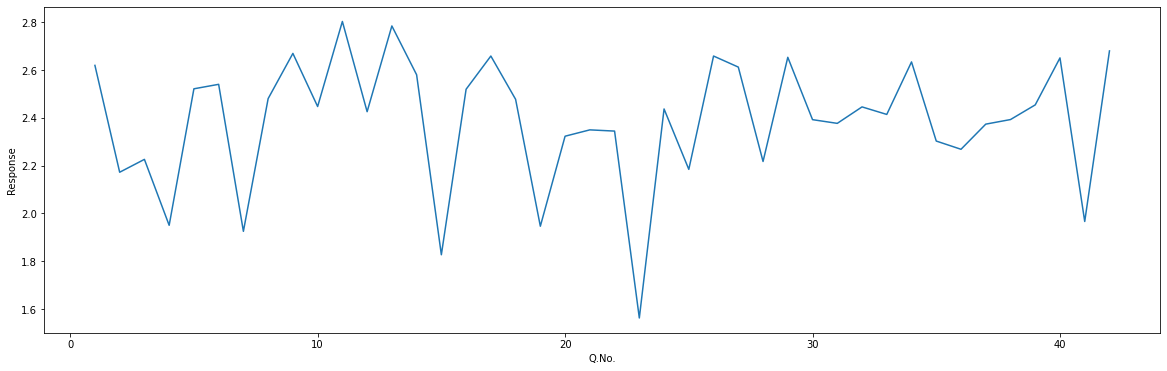

In [11]:
plt.figure(figsize=(20,6))
sns.lineplot(data=Questions, x=Questions.index, y='Response')

<Figure size 1440x432 with 0 Axes>

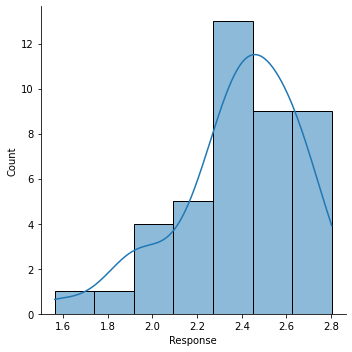

In [12]:
plt.figure(figsize=(20,6))
sns.displot(data=Questions, x='Response', kde=True)

Questions with significantly low response values

In [13]:
Questions[Questions['Response'] < 2]

,Response,Position,Time
Q.No.,,,
4,1.950170,21.499837,7128.728422
7,1.924928,21.528422,9776.971263
15,1.826901,21.501672,5243.594142
19,1.946298,21.549994,11244.458378
23,1.562288,21.479246,4603.325229
41,1.966160,21.483394,5540.696216


In [14]:
Questions[Questions['Time'] > 4]

,Response,Position,Time
Q.No.,,,
1,2.619485,21.555977,6970.590798
2,2.172269,21.248070,5332.375839
3,2.226097,21.583004,7426.446084
4,1.950170,21.499837,7128.728422
5,2.521458,21.492118,5919.305946
6,2.540214,21.562866,5724.097423
7,1.924928,21.528422,9776.971263
8,2.480427,21.569227,4444.626952
9,2.669591,21.582778,18330.829239


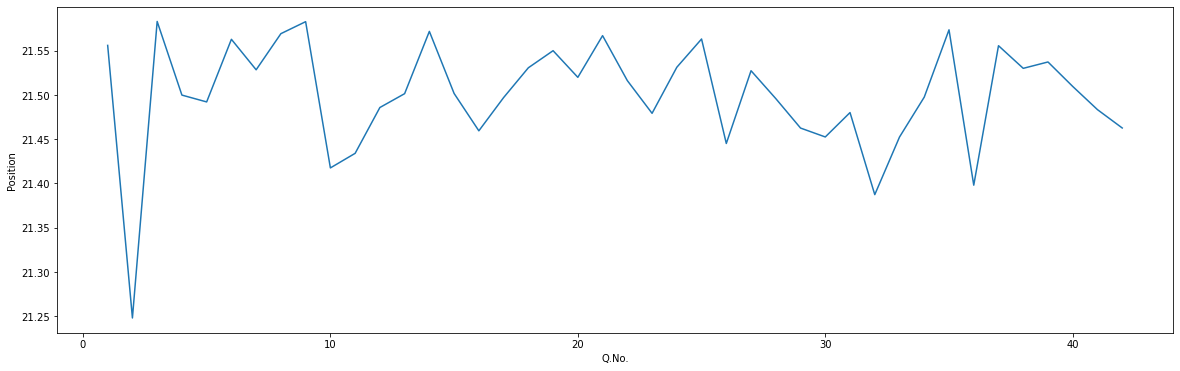

In [15]:
plt.figure(figsize=(20,6))
sns.lineplot(data=Questions, x=Questions.index, y='Position');

In [16]:
#Cell above: Average position of questions is almost same for all. Questions are placed randomly for each person.

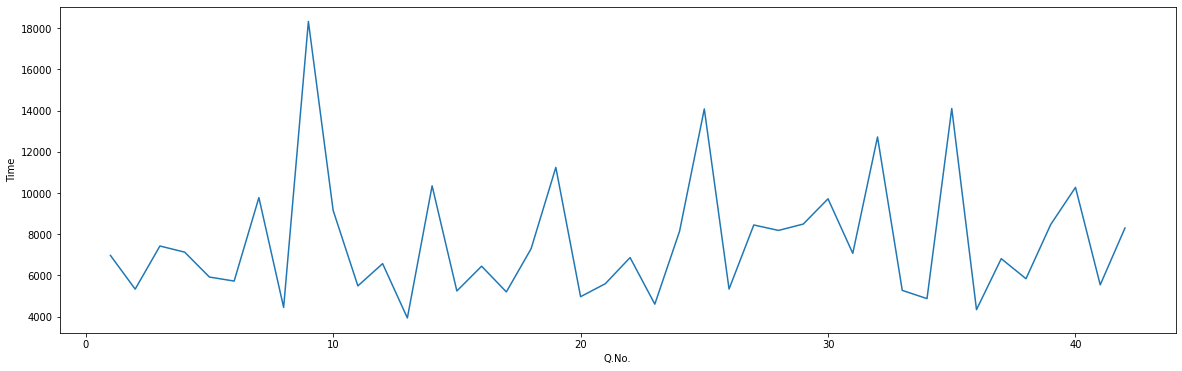

In [17]:
plt.figure(figsize=(20,6))
sns.lineplot(data=Questions, x=Questions.index, y='Time');

<Figure size 1440x432 with 0 Axes>

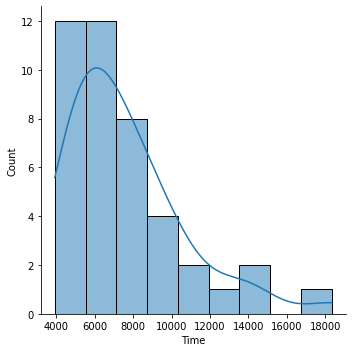

In [18]:
plt.figure(figsize=(20,6))
sns.displot(data=Questions, x='Time', kde=True)

Questions with significantly high response time

In [19]:
Questions[Questions['Time'] > 1000].head()

,Response,Position,Time
Q.No.,,,
1,2.619485,21.555977,6970.590798
2,2.172269,21.248070,5332.375839
3,2.226097,21.583004,7426.446084
4,1.950170,21.499837,7128.728422
5,2.521458,21.492118,5919.305946


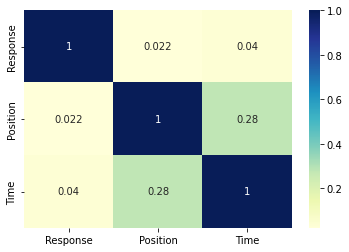

In [20]:
sns.heatmap(Questions.corr(), cmap='YlGnBu', annot=True);  ###Check the correlation btwn questions

In [21]:
#There isn't much correlation btwn response value and time taken
#There is a small correlation btwn time taken and average position

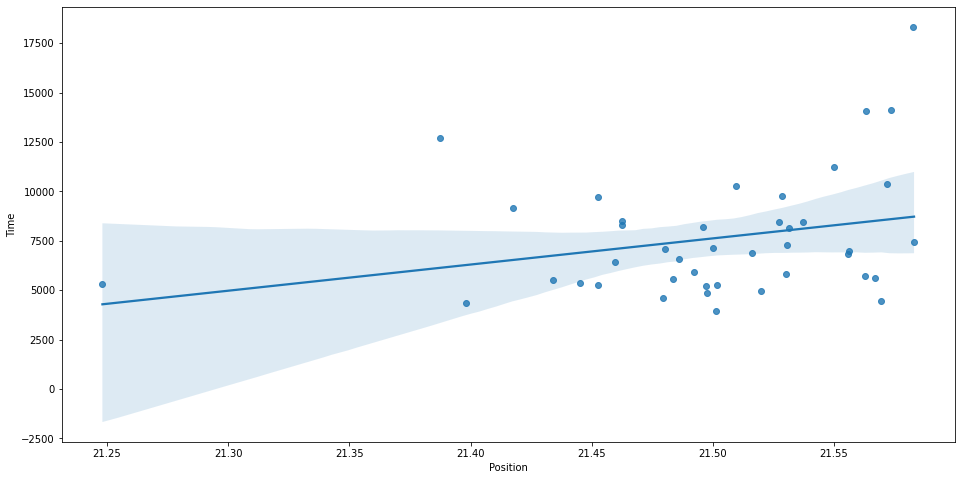

In [22]:
plt.figure(figsize=(16,8))
sns.regplot(data=Questions, x='Position', y='Time');

In [23]:
#TIPI and VCL https://www.kaggle.com/dsanr1/predicting-anxiety-eda/notebook

In [24]:
#The Ten Item Personality Inventory was administered (see Gosling, S. D., Rentfrow, P. J., & Swann, W. B., Jr. (2003). A Very Brief Measure of the Big Five Personality Domains. Journal of Research in Personality, 37, 504-528.):

#TIPI1 Extraverted, enthusiastic. TIPI2 Critical, quarrelsome. TIPI3 Dependable, self-disciplined. TIPI4 Anxious, easily upset. TIPI5 Open to new experiences, complex. TIPI6 Reserved, quiet. TIPI7 Sympathetic, warm. TIPI8 Disorganized, careless. TIPI9 Calm, emotionally stable. TIPI10 Conventional, uncreative.

#The TIPI items were rated "I see myself as:" _ such that

In [25]:
#The following items were presented as a check-list and subjects were instructed "In the grid below, check all the words whose definitions you are sure you know":

#VCL1 boat VCL2 incoherent VCL3 pallid VCL4 robot VCL5 audible VCL6 cuivocal VCL7 paucity VCL8 epistemology VCL9 florted VCL10 decide VCL11 pastiche VCL12 verdid VCL13 abysmal VCL14 lucid VCL15 betray VCL16 funny

#A value of 1 is checked, 0 means unchecked. The words at VCL6, VCL9, and VCL12 are not real words and can be used as a validity check.

TIPI and VCL1

In [26]:
data.iloc[:, 131:157]

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16
0,1,5,7,7,7,7,7,5,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1
1,6,5,4,7,5,4,7,7,1,5,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1
2,2,5,2,2,5,6,5,5,3,2,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1
3,1,1,7,4,6,4,6,1,6,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1
4,2,5,3,6,5,5,5,6,3,3,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,2,2,3,5,6,5,5,3,3,6,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1
39771,4,5,5,7,4,6,4,7,4,4,1,1,0,1,1,0,0,0,0,1,0,1,0,1,1,1
39772,6,6,7,5,6,3,6,1,5,4,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,1
39773,1,6,5,7,3,5,3,5,3,4,1,1,1,1,1,0,0,1,0,1,0,0,1,1,1,1


In [27]:
data.iloc[:, 131:157].mean(axis=0)

TIPI1     3.786097
TIPI2     4.192885
TIPI3     4.742275
TIPI4     5.172923
TIPI5     4.934331
TIPI6     4.851540
TIPI7     5.273639
TIPI8     4.280955
TIPI9     3.649503
TIPI10    3.731062
VCL1      0.812370
VCL2      0.579862
VCL3      0.152357
VCL4      0.866851
VCL5      0.684827
VCL6      0.040176
VCL7      0.083595
VCL8      0.169302
VCL9      0.043143
VCL10     0.870597
VCL11     0.073690
VCL12     0.084274
VCL13     0.291464
VCL14     0.565707
VCL15     0.846964
VCL16     0.930886
dtype: float64

In [28]:
qr = data[response_c].mean(axis=1)
qr

0        3.404762
1        2.619048
2        2.619048
3        2.166667
4        3.404762
           ...   
39770    2.500000
39771    3.523810
39772    1.238095
39773    2.476190
39774    2.261905
Length: 39775, dtype: float64

In [29]:
#response_c = [] #column list of response

In [30]:
tipi = data.iloc[:, 131:141]
tipi

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10
0,1,5,7,7,7,7,7,5,1,1
1,6,5,4,7,5,4,7,7,1,5
2,2,5,2,2,5,6,5,5,3,2
3,1,1,7,4,6,4,6,1,6,1
4,2,5,3,6,5,5,5,6,3,3
...,...,...,...,...,...,...,...,...,...,...
39770,2,2,3,5,6,5,5,3,3,6
39771,4,5,5,7,4,6,4,7,4,4
39772,6,6,7,5,6,3,6,1,5,4
39773,1,6,5,7,3,5,3,5,3,4


In [31]:
tipi.insert(0, 'response', qr.values)

In [32]:
###Already created it (ran the cell twice)

In [33]:
tipi

,response,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10
0,3.404762,1,5,7,7,7,7,7,5,1,1
1,2.619048,6,5,4,7,5,4,7,7,1,5
2,2.619048,2,5,2,2,5,6,5,5,3,2
3,2.166667,1,1,7,4,6,4,6,1,6,1
4,3.404762,2,5,3,6,5,5,5,6,3,3
...,...,...,...,...,...,...,...,...,...,...,...
39770,2.500000,2,2,3,5,6,5,5,3,3,6
39771,3.523810,4,5,5,7,4,6,4,7,4,4
39772,1.238095,6,6,7,5,6,3,6,1,5,4
39773,2.476190,1,6,5,7,3,5,3,5,3,4


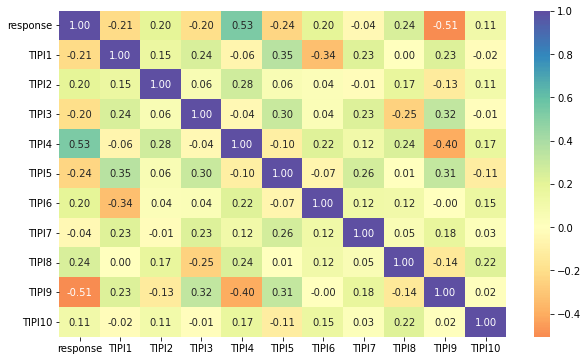

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(tipi.corr(), cmap='Spectral', annot=True, fmt='.2f', center=0) #'YlGnBu'

In [35]:
#There is +0.53 correlation between High Anxiety based on response values and TIPI4-Anxious, easily upset.
#There is -0.51 correlation between High Anxiety based on response values and TIPI9-Calm, emotionally stable.
#Not much of a surprise.

In [36]:
vcl = data.iloc[:, 141:157] #start on 138 to grab some TIPI
vcl.head()

,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16
0,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1
1,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1
2,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1
3,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1
4,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1


In [37]:
vcl.insert(0, 'response', qr.values)
vcl

,response,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16
0,3.404762,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1
1,2.619048,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1
2,2.619048,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1
3,2.166667,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1
4,3.404762,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,2.500000,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1
39771,3.523810,1,1,0,1,1,0,0,0,0,1,0,1,0,1,1,1
39772,1.238095,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,1
39773,2.476190,1,1,1,1,1,0,0,1,0,1,0,0,1,1,1,1


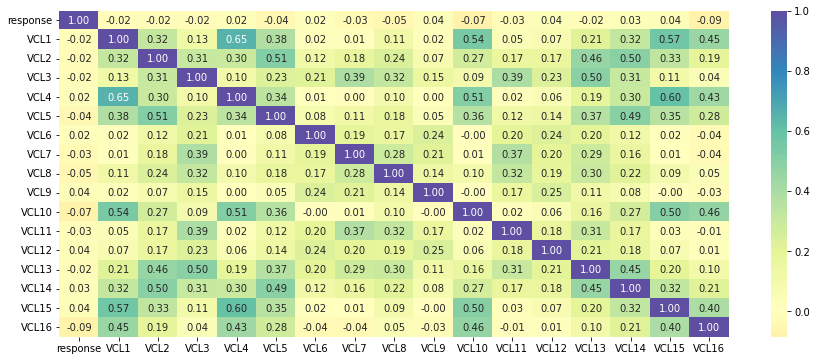

In [38]:
plt.figure(figsize=(15,6))
sns.heatmap(vcl.corr(), cmap='Spectral', annot=True, fmt='.2f', center=0);

In [39]:
###Response values don't have significant correlation with any vocabulary values.

Demographic Data

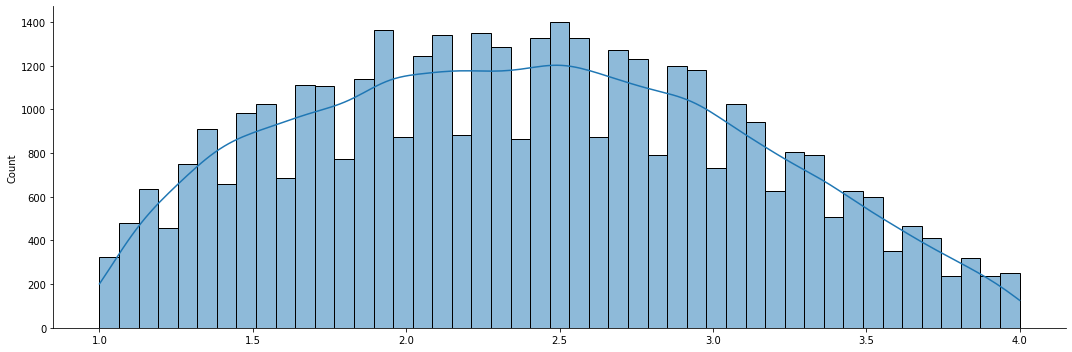

In [40]:
#Distribution plot of mean response values of all people

sns.displot(data[response_c].mean(axis=1), kde=True, height=5, aspect=3);

In [41]:
demography = data.iloc[:, 157:]
demography.tail(3)

,education,urban,gender,engnat,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
39772,3,2,2,1,48,2,1,1,7,1,30,1,2,3,Computer Science
39773,3,2,2,1,20,2,1,1,6,1,60,1,1,2,History
39774,3,3,2,2,26,1,1,1,10,1,10,1,1,4,Cognitive Science


In [42]:
#qr = data[response_c].mean(axis=1)

In [43]:
demography.insert(0, 'response', qr.values)

In [44]:
demography.head()

,response,education,urban,gender,engnat,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,3.404762,2,3,2,2,16,1,1,1,12,1,10,2,1,2,None
1,2.619048,2,3,2,1,16,2,1,2,7,0,70,2,1,4,None
2,2.619048,2,3,2,2,17,2,1,1,4,3,60,1,1,3,None
3,2.166667,1,3,2,1,13,2,1,2,4,5,70,2,1,5,biology
4,3.404762,3,2,2,2,19,2,2,3,10,1,10,2,1,4,Psychology


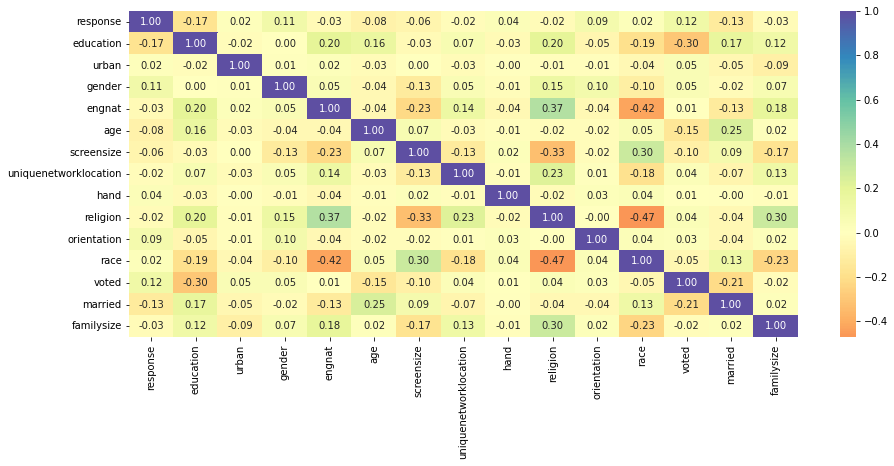

In [45]:
plt.figure(figsize=(15,6))
sns.heatmap(demography.corr(), cmap='Spectral', annot=True, fmt='.2f', center=0);

In [46]:
###High education has slighl negative correlation (-0.17) with High Anxiety

In [47]:
demography.columns

Index(['response', 'education', 'urban', 'gender', 'engnat', 'age',
       'screensize', 'uniquenetworklocation', 'hand', 'religion',
       'orientation', 'race', 'voted', 'married', 'familysize', 'major'],
      dtype='object')

In [48]:
#Start: Categorical plots of response values and demographics variables

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(20,12))

l = ['education', 'urban', 'gender', 'engnat', 'screensize', 'uniquenetworklocation',
     'hand', 'religion', 'orientation', 'race', 'voted', 'married', 'familysize']

for i, ax in enumerate(axes.ravel()):

  sns.boxenplot(data=demography, y='response', x=l[i], ax=ax)

plt.tight_layout()

#Oct 26, 2021 — The numpy.ravel() functions returns contiguous flattened array(1D array with all the input-array elements and with the same type as it).

In [ ]:
###https://www.statology.org/pandas-factorize/

In [ ]:
def correlation_ratio(categories, measurements):

  fcat, _ = pd.factorize(categories) ###Print
  cat_num = np.max(fcat) +1
  y_avg_array = np.zeros(cat_num)
  n_array = np.zeros(cat_num)
  for i in range(0, cat_num):
    cat_measures = measurements[np.argwhere(fcat == i).flatten()]
    n_array[i] = len(cat_measures)
    y_avg_array[i] = np.average(cat_measures)
  y_total_avg = np.sum(np.multiply(y_avg_array,n_array))//np.sum(n_array)

  numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
  denominator = np.sum(np.power(np.subtract(measurements, y_total_avg), 2))
  if numerator == 0:
    eta = 0.0
  else:
    eta = np.sqrt(numerator/denominator)
  return eta

In [ ]:
###Correlation between categorical variables and response values (0 to 1)

In [ ]:
cat_list = ['education', 'urban', 'gender', 'engnat', 'screensize', 'uniquenetworklocation','hand', 'orientation', 'voted', 'married', 'familysize']

In [ ]:
for i in cat_list:
  print(i)
  print(f"{correlation_ratio(demography[i], demography['response'])}")

education "How much education have you completed?", 1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree urban "What type of area did you live when you were a child?", 1=Rural (country side), 2=Suburban, 3=Urban (town, city) gender "What is your gender?", 1=Male, 2=Female, 3=Other engnat "Is English your native language?", 1=Yes, 2=No age "How many years old are you?" hand "What hand do you use to write with?", 1=Right, 2=Left, 3=Both religion "What is your religion?", 1=Agnostic, 2=Atheist, 3=Buddhist, 4=Christian (Catholic), 5=Christian (Mormon), 6=Christian (Protestant), 7=Christian (Other), 8=Hindu, 9=Jewish, 10=Muslim, 11=Sikh, 12=Other orientation "What is your sexual orientation?", 1=Heterosexual, 2=Bisexual, 3=Homosexual, 4=Asexual, 5=Other race "What is your race?", 10=Asian, 20=Arab, 30=Black, 40=Indigenous Australian, 50=Native American, 60=White, 70=Other voted "Have you voted in a national election in the past year?", 1=Yes, 2=No married "What is your marital status?", 1=Never married, 2=Currently married, 3=Previously married familysize "Including you, how many children did your mother have?"

In [ ]:
#Education:

demography.groupby('education').count()

In [ ]:
demography.groupby('education').mean()

gender

In [ ]:
demography.groupby('gender').count()

In [ ]:
demography.groupby('gender').mean()

In [ ]:
demography.groupby('married').mean()

In [ ]:
demography.groupby('married').count()

In [ ]:
#Screen size

demography.groupby('screensize').mean()

In [ ]:
#While Bigger screen size is associated with sightly less response value(2.31 vs 2.41), the difference is small and can probably be affected by other factors.

In [ ]:
demography[(demography['education']==3) & (demography['gender'] == 2) & (demography['married']==1)].groupby('screensize').mean()